### 次の積分について，モンテカルロ法によって数値積分するプログラム
### $$\int_{0}^{1} \exp(-\dfrac{x^2}{2}) dx$$

In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 被積分関数の定義
def func_f(x):
    return np.exp(-x**2 / 2)

In [3]:
# モンテカルロ法
def monte_carlo(func_f, x_min, x_max, y_min, y_max, n=10**8, seed=0):
    """
    func_f: 被積分関数
    x_min:  乱数xの最小値
    x_max:  乱数xの最大値
    y_min:  乱数yの最小値
    y_max:  乱数yの最大値
    n:      乱数の数
    seed:   乱数のシード
    """
    # 乱数x,yを生成
    np.random.seed(seed=seed)
    x = np.random.uniform(x_min, x_max, n)
    y = np.random.uniform(y_min, y_max, n)

    # x,yの値を格納するリスト
    xin_list = []   # 被積分関数の下にあるxのリスト
    yin_list = []   # 被積分関数の下にあるyのリスト
    xout_list = []  # 被積分関数の上にあるxのリスト
    yout_list = []  # 被積分関数の上にあるyのリスト
    integral_value_list = []  # 推定値のリスト

    # 面積の計算
    num_all = 0  # 全ての点の数
    num_in = 0   # 被積分関数の下にある点の数
    for i in range(n):
        num_all += 1
        if y[i] <= func_f(x[i]):
            num_in += 1
            xin_list.append(x[i])
            yin_list.append(y[i])
        else:
            xout_list.append(x[i])
            yout_list.append(y[i])

        integral_value_list.append((x_max-x_min)*(y_max-y_min)*num_in/num_all)

    return integral_value_list, xin_list, yin_list, xout_list, yout_list

In [4]:
# モンテカルロ法での計算
for n in range(6):
    integral_value_list, xin_list, yin_list, xout_list, yout_list = monte_carlo(func_f, 0.0, 1.0, 0.0, 1.0, 10**n)
    print("n = {:6d}:  integral_value = {:.15f}".format(10**n, integral_value_list[-1]))

n =      1:  integral_value = 1.000000000000000
n =     10:  integral_value = 0.700000000000000
n =    100:  integral_value = 0.870000000000000
n =   1000:  integral_value = 0.836000000000000
n =  10000:  integral_value = 0.854800000000000
n = 100000:  integral_value = 0.853950000000000


In [5]:
# matplotlibのレイアウト設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.size"] = 16

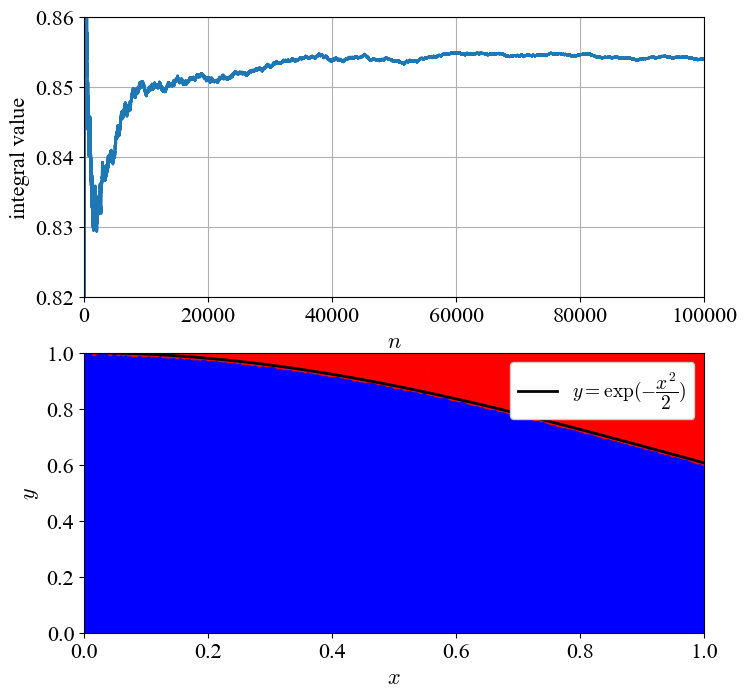

In [6]:
# グラフの描画
n = np.arange(len(integral_value_list))
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(n, integral_value_list, linewidth=2.0)
ax1.set_xlabel('$n$')
ax1.set_ylabel('integral value')
ax1.set_xlim(0, len(integral_value_list))
ax1.set_ylim(0.82, 0.86)
ax1.grid(True)

x = np.linspace(0.0, 1.0, 1000)
ax2 = fig.add_subplot(2,1,2)
ax2.plot(xin_list, yin_list, '.', color='b')
ax2.plot(xout_list, yout_list, '.', color='r')
ax2.plot(x, func_f(x), '-', color='k', linewidth=2.0, label='$y = \exp(-\dfrac{x^2}{2})$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.legend(loc='upper right', framealpha=1.0, fontsize=14)
ax2.set_xlim(0.0, 1.0)
ax2.set_ylim(0.0, 1.0)
ax2.grid(True)

plt.show()